In [41]:
import wptools
import pickle
import datetime
import matplotlib.pyplot as plt

In [42]:
%%capture --no-stdout
cat = wptools.category('Category:2019_deaths')
cat.get_members()
print("количество страниц:",len(cat.data['members']))


количество страниц: 8137


In [32]:
%%capture --no-stdout
pages=[]
for i in range(0,8136):
    page=wptools.page(pageid=cat.data['members'][i]['pageid'],timeout=0)
    page.get_parse()
    if(page.data.get('infobox') and 
       page.data['infobox'].get('birth_date') and 
       page.data['infobox'].get('death_date')):
        pages.append((page.data['infobox'].get('birth_date'), page.data['infobox'].get('death_date')))
    print(i,end="\r")

In [44]:
with open("data_0-8137.txt", "wb") as fp:
    pickle.dump(pages, fp)

In [45]:
with open("data_0-8137.txt", "rb") as fp:  
    pages = pickle.load(fp)


In [46]:
def parser(birth,death):
    if(birth.lower().find("birth date")!=-1 and death.lower().find("death date")!=-1):
        birth=list(filter(lambda x:x!='',
                     ''.join(list(filter(lambda x:x.isdigit() or x=="|",birth))).split("|")))[0:3]
        death=list(filter(lambda x:x!='',
                     ''.join(list(filter(lambda x:x.isdigit() or x=="|",death))).split("|")))[0:3]
        try:
            return (datetime.date(*map(int,birth)),datetime.date(*map(int,death)))
        except ValueError:
            return None
        except TypeError:
            return None
    return None

In [47]:
dates=list(filter(lambda x:x is not None,map(lambda page:parser(page[0], page[1]),pages)))  

print(len(pages),len(dates))
distanse_dates=list(map(lambda date:((date[0]-datetime.date(date[0].year,1,1))-
                                   (date[1]-datetime.date(date[1].year,1,1))).days,dates))
def circle(x):
    if(x>182):
        return -364+x
    if(x<-182):
        return 364+x
    return x
distanse_dates=list(map(circle,distanse_dates))

5287 4286


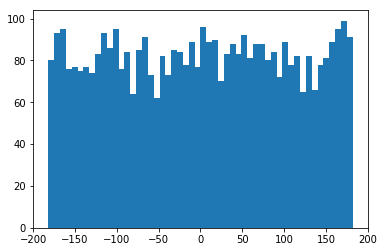

In [49]:
plt.hist(distanse_dates,bins=52)
plt.show()